## Ensemble classifiers applicati su iris dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [5]:
n_classes = 3
plot_colors = [colors[0], colors[1], colors[2]]
cMap = mcolors.ListedColormap(colors[0:3])
plot_step = 0.02  # fine step width for decision surface contours
RANDOM_SEED = 13  # fix the seed on each iteration

iris = load_iris()

In [6]:
maxdepth = 2

Decision Tree


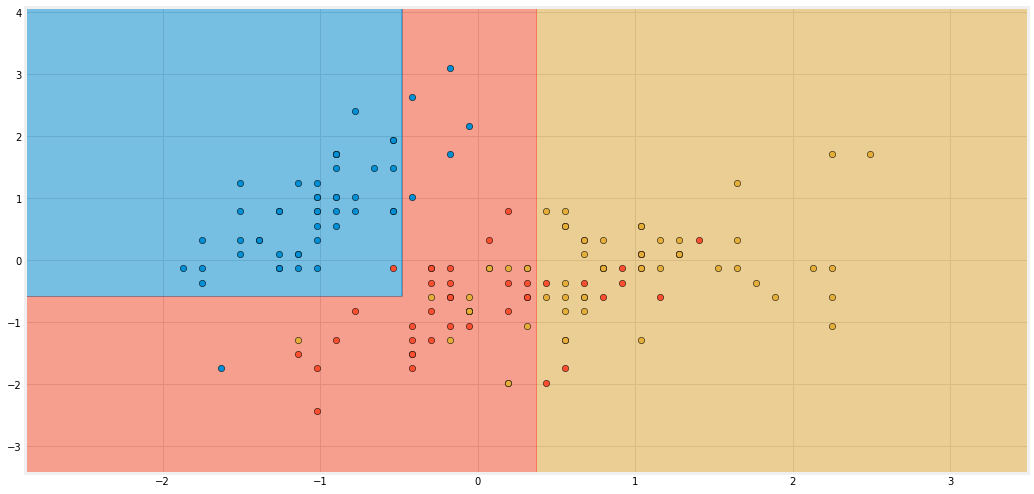

Decision trees with features 0-1, maxdepth=2 Score = 0.77333


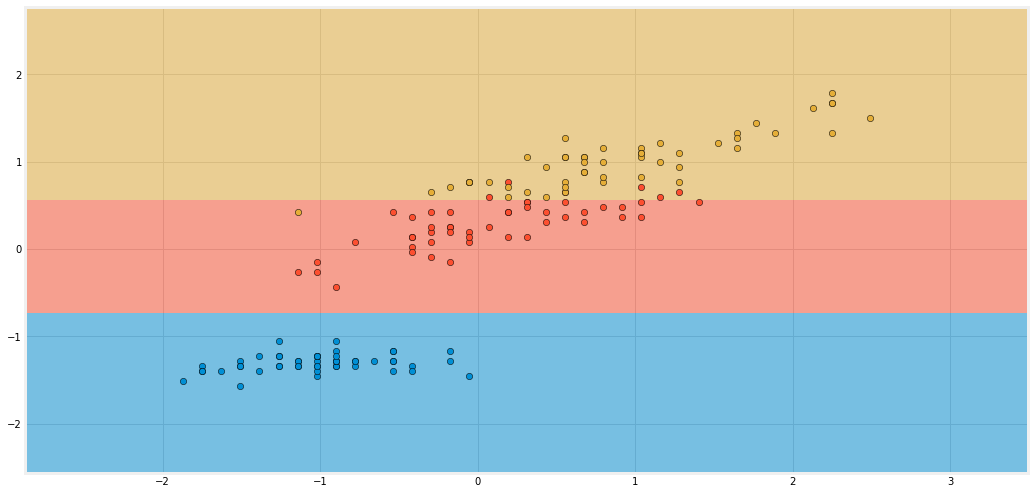

Decision trees with features 0-2, maxdepth=2 Score = 0.95333


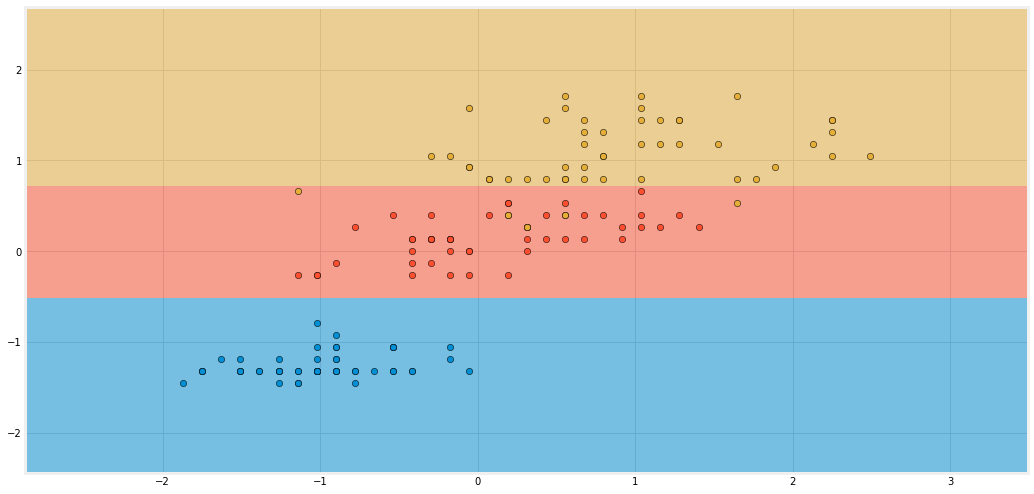

Decision trees with features 0-3, maxdepth=2 Score = 0.96000


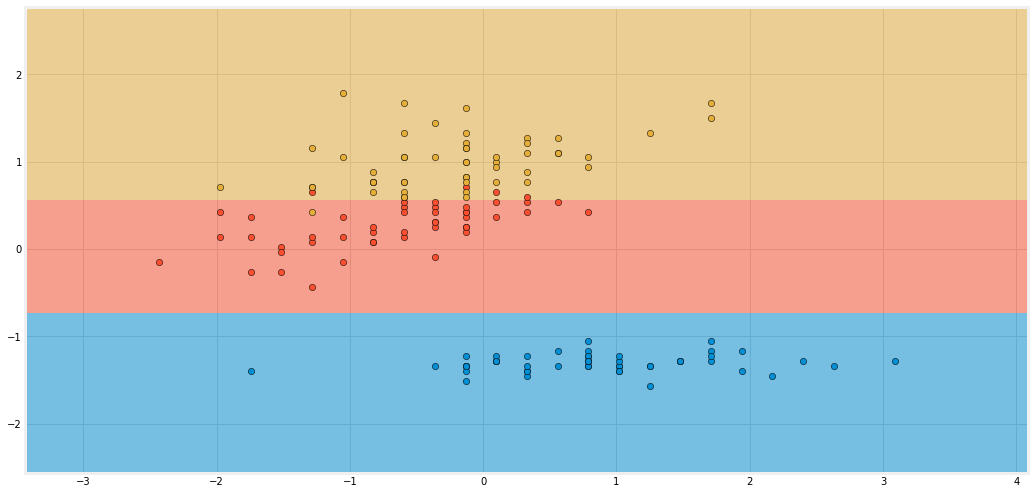

Decision trees with features 1-2, maxdepth=2 Score = 0.95333


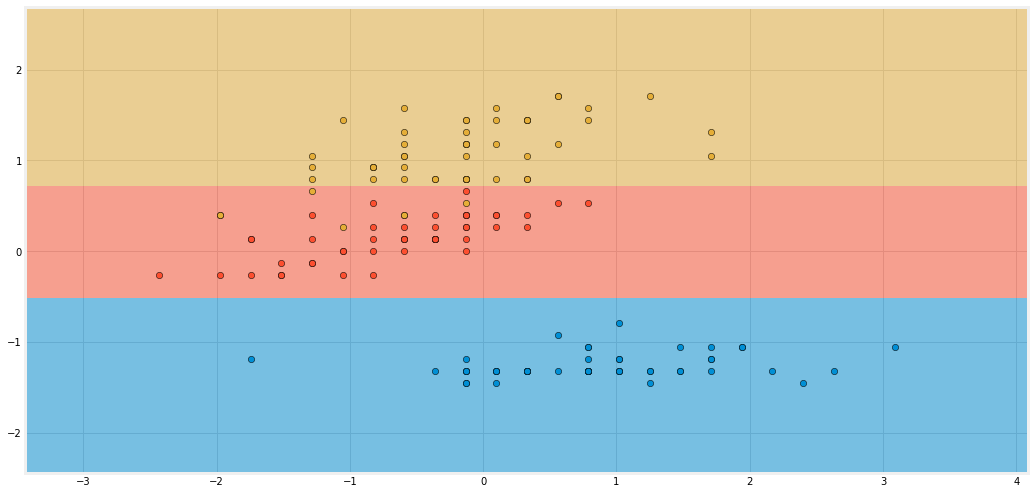

Decision trees with features 1-3, maxdepth=2 Score = 0.96000


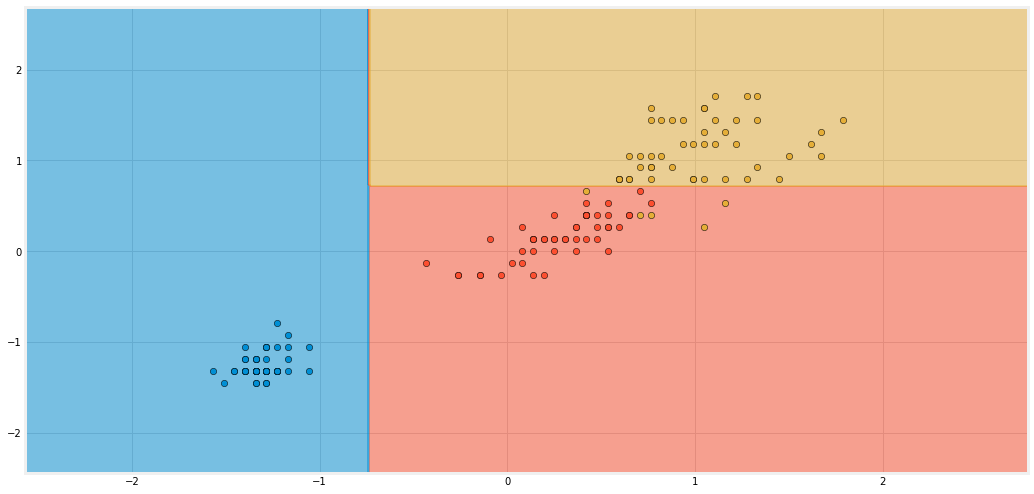

Decision trees with features 2-3, maxdepth=2 Score = 0.96000


In [8]:
model = DecisionTreeClassifier(max_depth=maxdepth)
print( 'Decision Tree' )
for pair in ([0, 1], [0, 2], [0, 3],[1, 2], [1, 3], [2, 3]):
        X = iris.data[:, pair]
        y = iris.target

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        clf = clone(model)
        clf = model.fit(X, y)

        scores = clf.score(X, y)

        fig = plt.figure(figsize=(16,8))
        fig.patch.set_facecolor('white')
        ax = fig.gca()
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=cMap, alpha=.5)

        # Plot the training points
        for i, c in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=c, edgecolors='k', s=40, label=iris.target_names[i],cmap=cMap)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
        print("Decision trees with features {0:d}-{1:d}, maxdepth={2:d} Score = {3:3.5f}".format(pair[0], pair[1], maxdepth, scores))

In [9]:
model = DecisionTreeClassifier(max_depth=maxdepth)
clf = model.fit(iris.data,iris.target)
scores = clf.score(iris.data,iris.target)
scores

0.96

Random forest


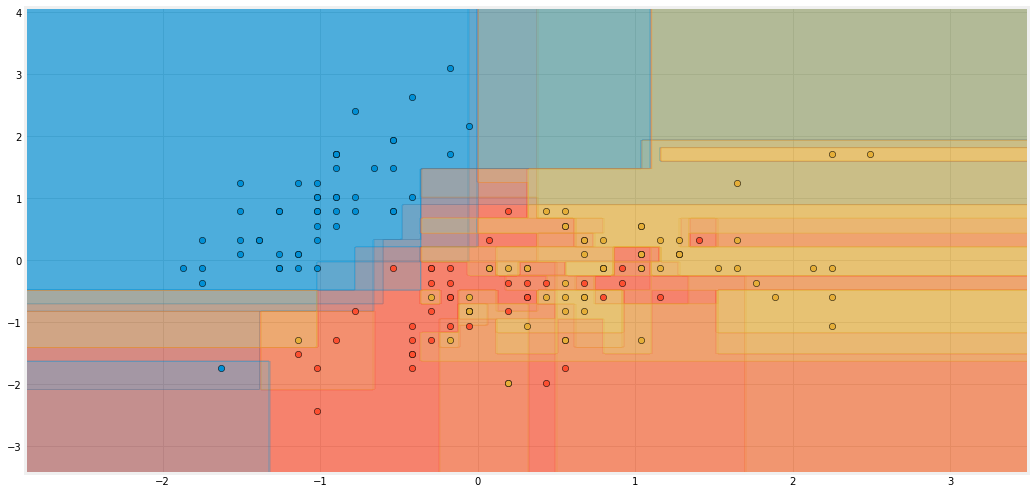

Random forest with features 0-1, 5 estimators. Score = 0.89333


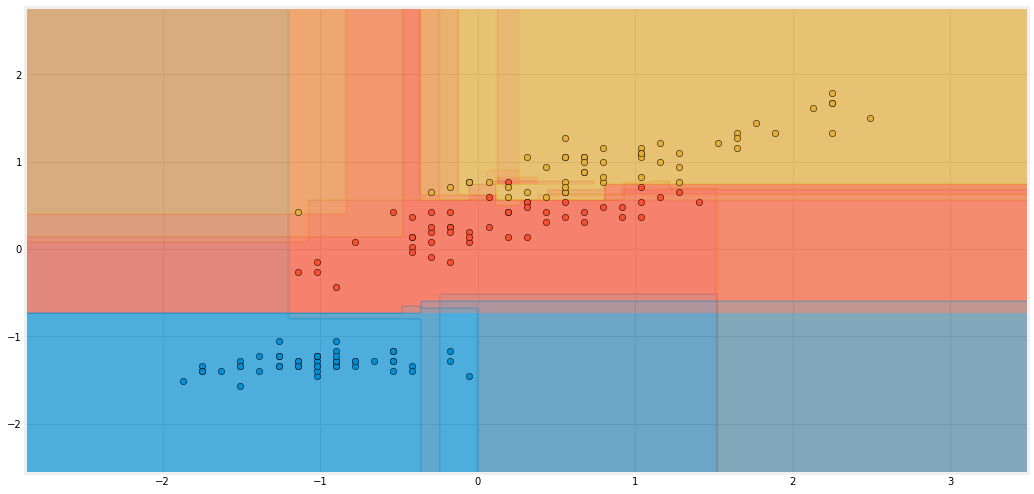

Random forest with features 0-2, 5 estimators. Score = 0.99333


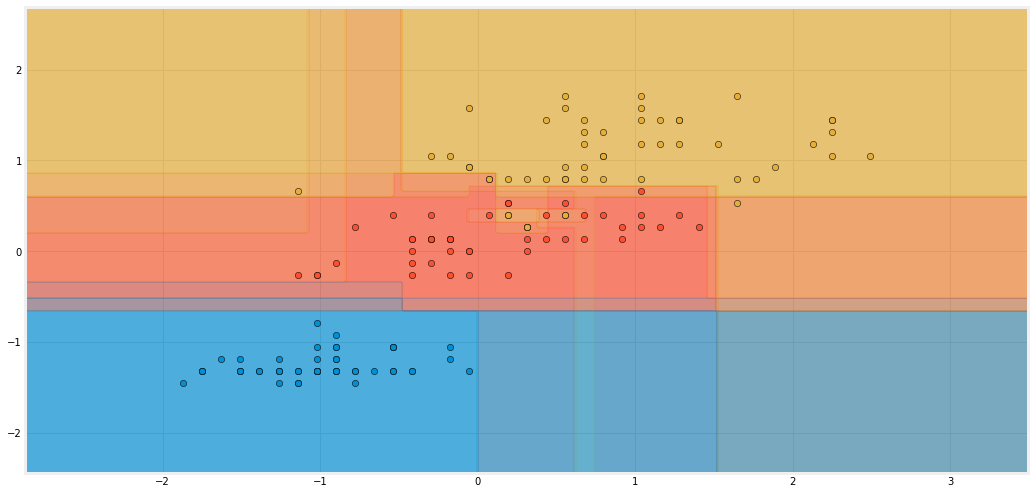

Random forest with features 0-3, 5 estimators. Score = 0.96667


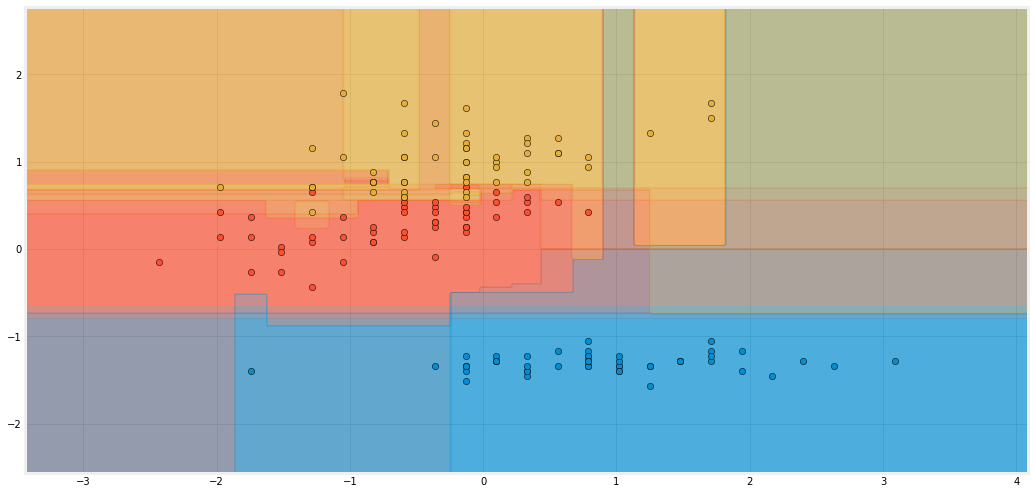

Random forest with features 1-2, 5 estimators. Score = 0.98000


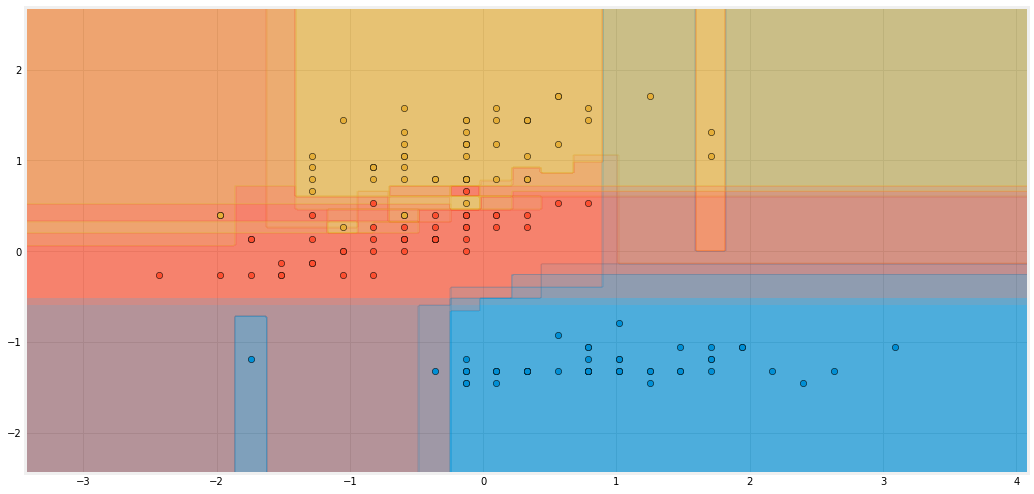

Random forest with features 1-3, 5 estimators. Score = 0.98000


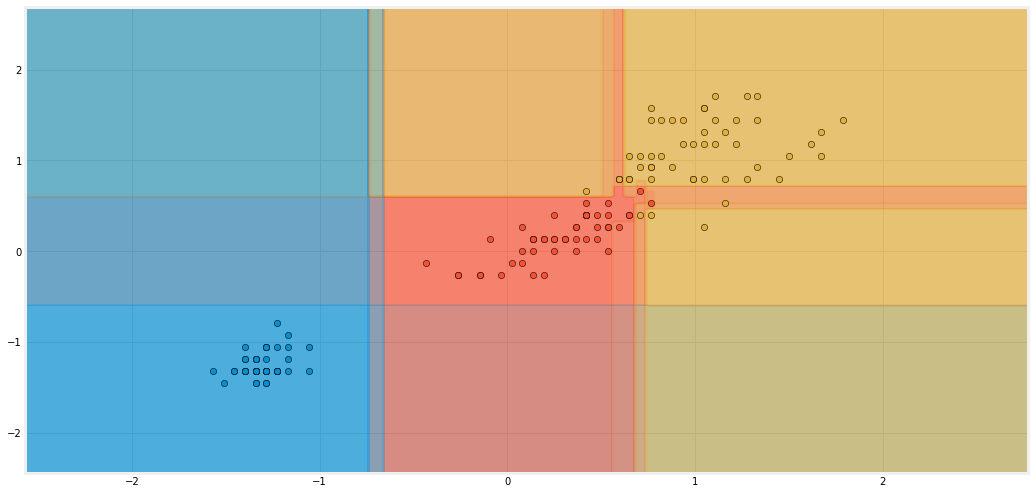

Random forest with features 2-3, 5 estimators. Score = 0.98667


In [10]:
# random forest
n_estimators = 5
model = RandomForestClassifier(n_estimators=n_estimators)
print( 'Random forest' )
for pair in ([0, 1], [0, 2], [0, 3],[1, 2], [1, 3], [2, 3]):
        X = iris.data[:, pair]
        y = iris.target

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        clf = clone(model)
        clf = model.fit(X, y)

        scores = clf.score(X, y)

        fig = plt.figure(figsize=(16,8))
        fig.patch.set_facecolor('white')
        ax = fig.gca()
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
        estimator_alpha = 1.0 / len(model.estimators_)
        for tree in model.estimators_:
            Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cMap)

        # Plot the training points
        for i, c in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=c, edgecolors='k', s=40, label=iris.target_names[i],cmap=cMap)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
        print("Random forest with features {0:d}-{1:d}, {2:d} estimators. Score = {3:3.5f}".format(pair[0], pair[1], n_estimators, scores))

In [11]:
model = RandomForestClassifier(n_estimators=n_estimators)
clf = model.fit(iris.data,iris.target)
scores = clf.score(iris.data,iris.target)
scores

1.0

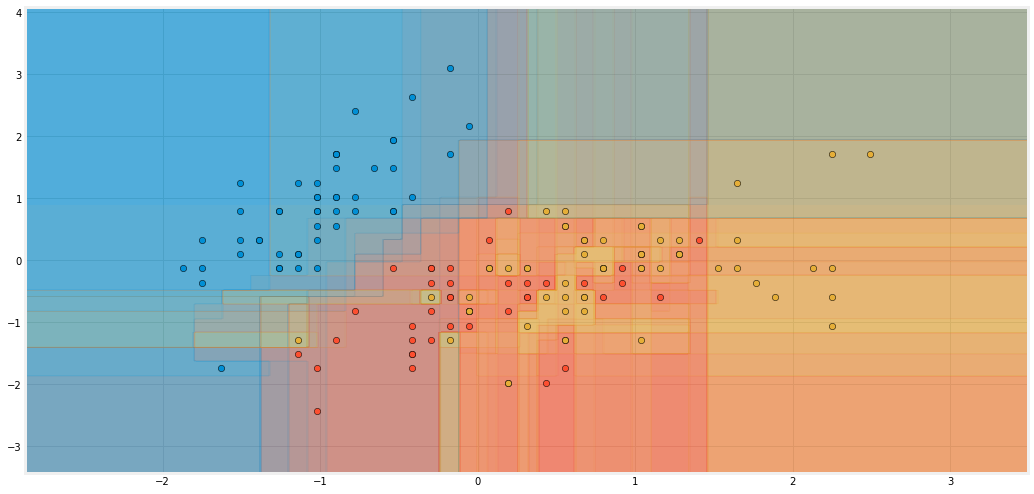

Adaboost with features: 0-1, maxdepth=13, 15 estimators. Score = 0.92667


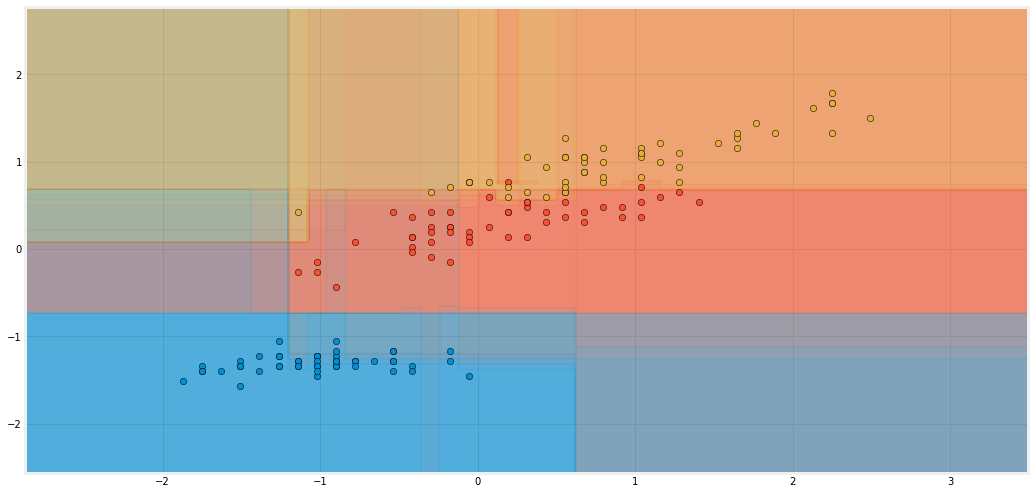

Adaboost with features: 0-2, maxdepth=13, 15 estimators. Score = 0.99333


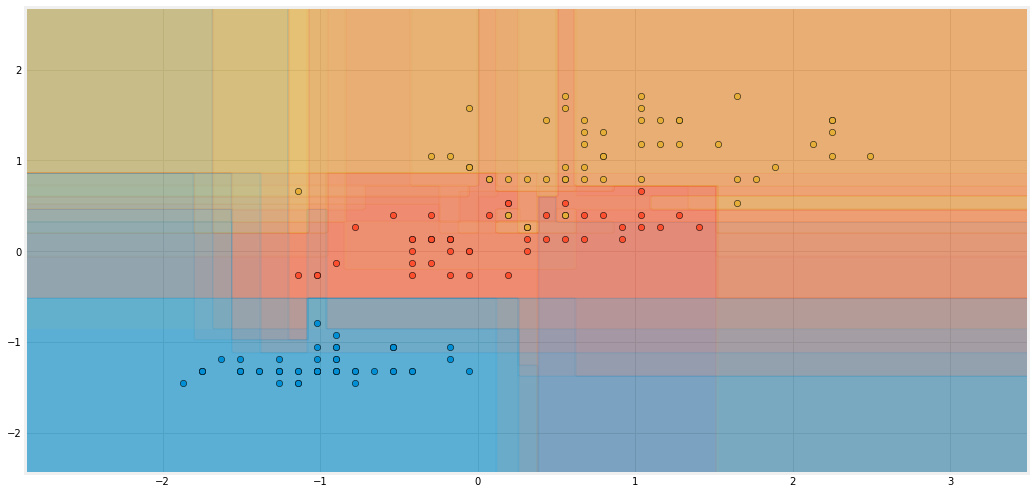

Adaboost with features: 0-3, maxdepth=13, 15 estimators. Score = 0.97333


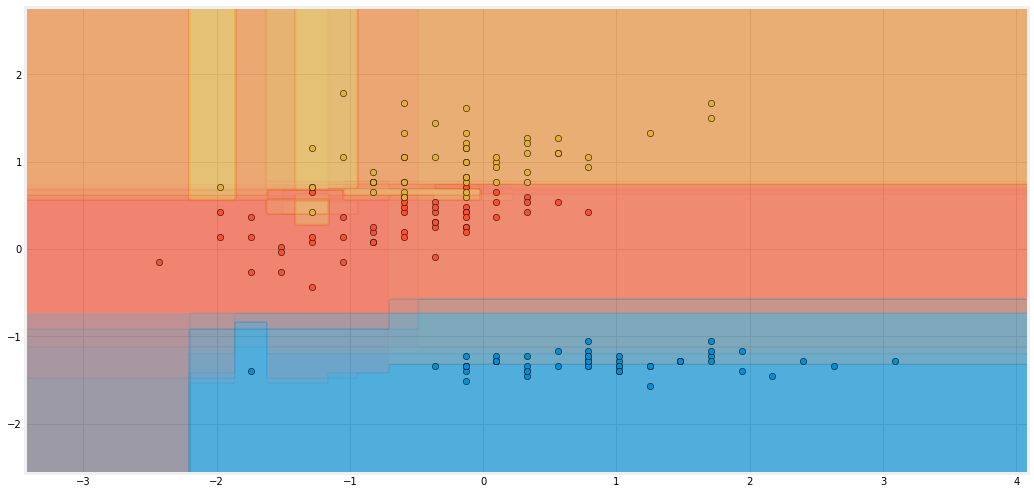

Adaboost with features: 1-2, maxdepth=13, 15 estimators. Score = 0.98667


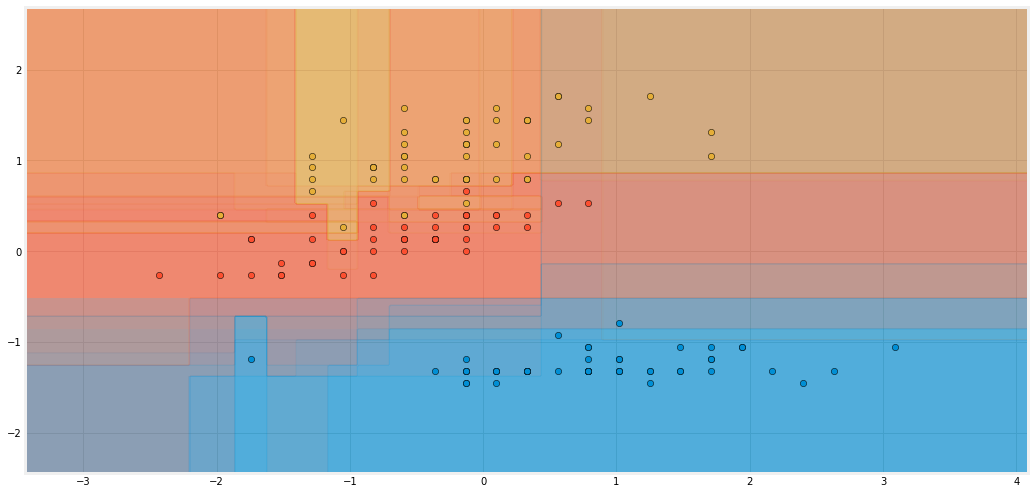

Adaboost with features: 1-3, maxdepth=13, 15 estimators. Score = 0.98000


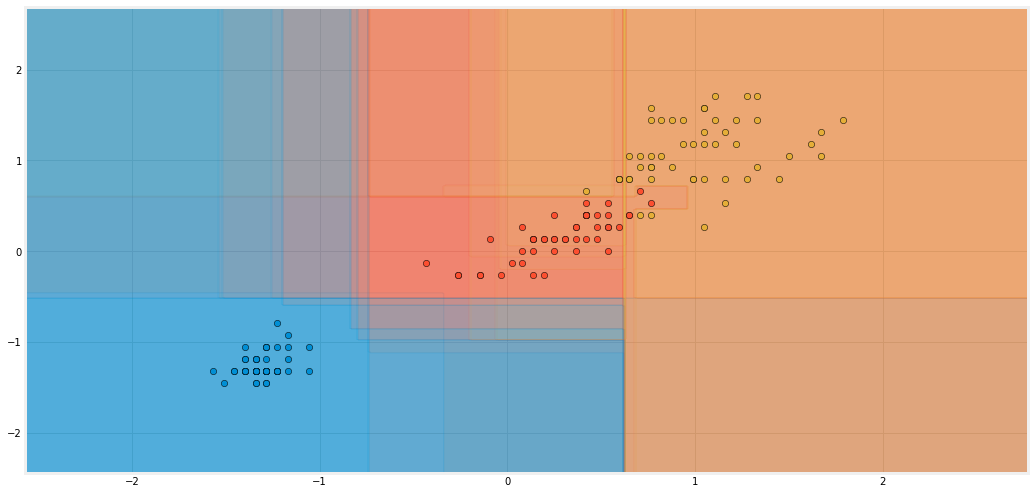

Adaboost with features: 2-3, maxdepth=13, 15 estimators. Score = 0.99333


In [12]:
# adaboost        
md = 13
n_estimators = 15
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=md),n_estimators=n_estimators)
for pair in ([0, 1], [0, 2], [0, 3],[1, 2], [1, 3], [2, 3]):
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        clf = clone(model)
        clf = model.fit(X, y)

        scores = clf.score(X, y)

        fig = plt.figure(figsize=(16,8))
        fig.patch.set_facecolor('white')
        ax = fig.gca()
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
        estimator_alpha = 1.0 / len(model.estimators_)
        for tree in model.estimators_:
            Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cMap)

        # Plot the training points
        for i, c in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=c, edgecolors='k', s=40, label=iris.target_names[i],cmap=cMap)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
        print("Adaboost with features: {0:d}-{1:d}, maxdepth={2:d}, {3:d} estimators. Score = {4:3.5f}".format(pair[0], pair[1], md, n_estimators, scores))

In [13]:
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=md),n_estimators=n_estimators)
clf = model.fit(iris.data,iris.target)
scores = clf.score(iris.data,iris.target)
scores

1.0